<a href="https://colab.research.google.com/github/Aakash-legend/TSC/blob/main/TSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("viditgandhi/tree-species-identification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tree-species-identification-dataset


In [9]:
import shutil

# Define the source path (where the dataset is downloaded)
source_path = '/kaggle/input/tree-species-identification-dataset'

# Define the destination path (replace with your desired path)
destination_path = '/content/tree-species-dataset'

# Use shutil.copytree() to copy the directory
try:
    shutil.copytree(source_path, destination_path)
    print(f"Dataset copied successfully from {source_path} to {destination_path}")
except shutil.Error as e:
    print(f"Error copying dataset: {e}")
except FileNotFoundError:
    print(f"Source directory not found: {source_path}")
except FileExistsError:
    print(f"Destination directory already exists: {destination_path}")

Dataset copied successfully from /kaggle/input/tree-species-identification-dataset to /content/tree-species-dataset


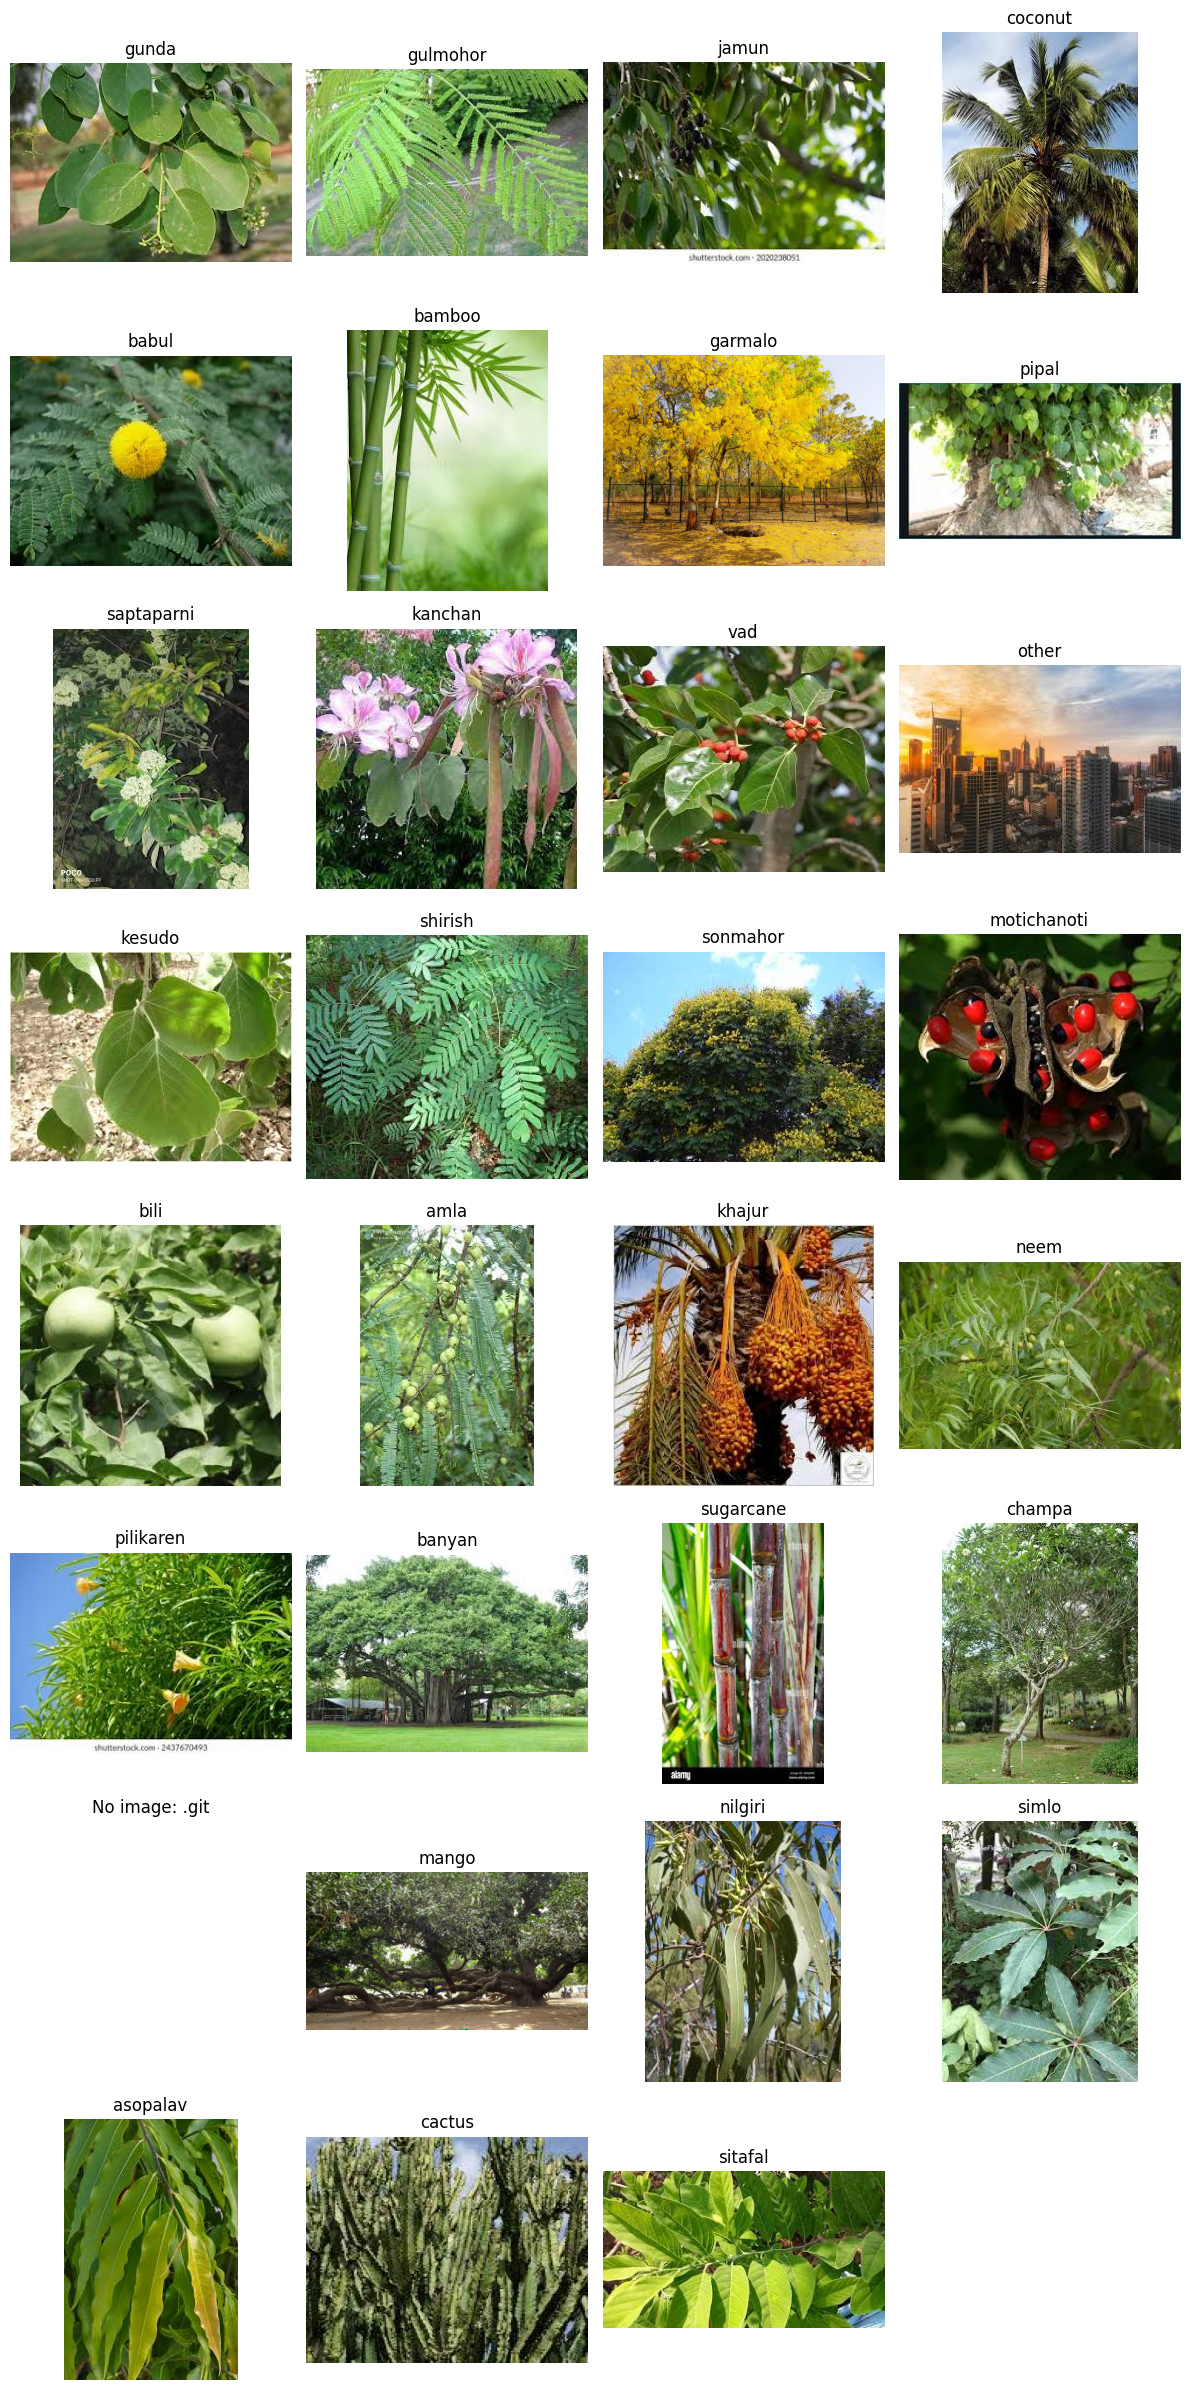

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = '/content/tree-species-dataset/Tree_Species_Dataset'
species_folders = [f.name for f in os.scandir(dataset_path) if f.is_dir()]
n_species = len(species_folders)
n_cols = 4
n_rows = (n_species + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
axes = axes.flatten()

for i, species_folder in enumerate(species_folders):
    folder_path = os.path.join(dataset_path, species_folder)
    image_files = [f.name for f in os.scandir(folder_path) if f.is_file() and f.name.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:
        image_path = os.path.join(folder_path, image_files[0])
        try:
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(species_folder)
            axes[i].axis('off') # Hide axes
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            axes[i].set_title(f"Error: {species_folder}")
            axes[i].axis('off')
    else:
        axes[i].set_title(f"No image: {species_folder}")
        axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [11]:
def remove_git_dir(directory):
    git_path = os.path.join(directory, '.git')
    if os.path.exists(git_path):
        print(f"Removing .git directory from {directory}")
        try:
            shutil.rmtree(git_path)
            print(f"Successfully removed {git_path}")
        except Exception as e:
            print(f"Error removing {git_path}: {e}")

remove_git_dir("/content/tree-species-dataset/Tree_Species_Dataset")


Removing .git directory from /content/tree-species-dataset/Tree_Species_Dataset
Successfully removed /content/tree-species-dataset/Tree_Species_Dataset/.git


In [12]:
image_counts = {}
for species_folder in species_folders:
    if species_folder == '.git':
        continue
    folder_path = os.path.join(dataset_path, species_folder)
    image_files = [f.name for f in os.scandir(folder_path) if f.is_file() and f.name.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[species_folder] = len(image_files)

print("Number of images in each species folder:")
for folder, count in image_counts.items():
    print(f"{folder}: {count}")

Number of images in each species folder:
gunda: 50
gulmohor: 50
jamun: 50
coconut: 50
babul: 50
bamboo: 50
garmalo: 50
pipal: 50
saptaparni: 50
kanchan: 50
vad: 50
other: 150
kesudo: 50
shirish: 50
sonmahor: 50
motichanoti: 50
bili: 50
amla: 50
khajur: 50
neem: 50
pilikaren: 50
banyan: 50
sugarcane: 50
champa: 50
mango: 50
nilgiri: 50
simlo: 50
asopalav: 50
cactus: 50
sitafal: 50


In [13]:
repo_path = "/content/tree-species-dataset/Tree_Species_Dataset"
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 30


In [14]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

Width  Height
0    267     189
1    267     188
2    259     194
3    194     259
4    260     194

In [15]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1600


In [17]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [18]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [19]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


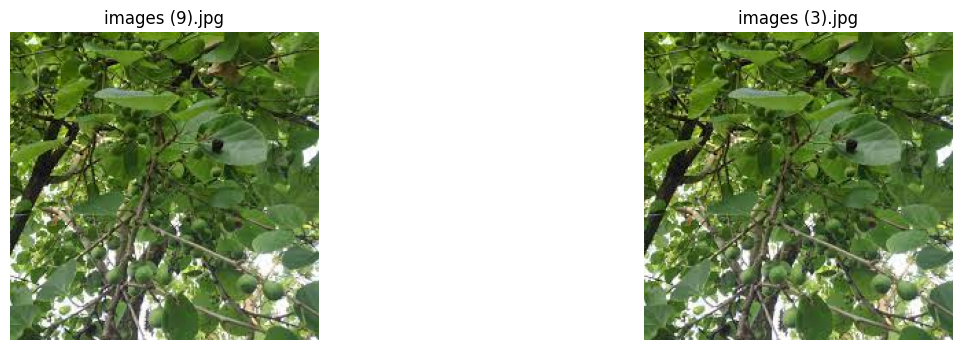

Duplicate set 2:


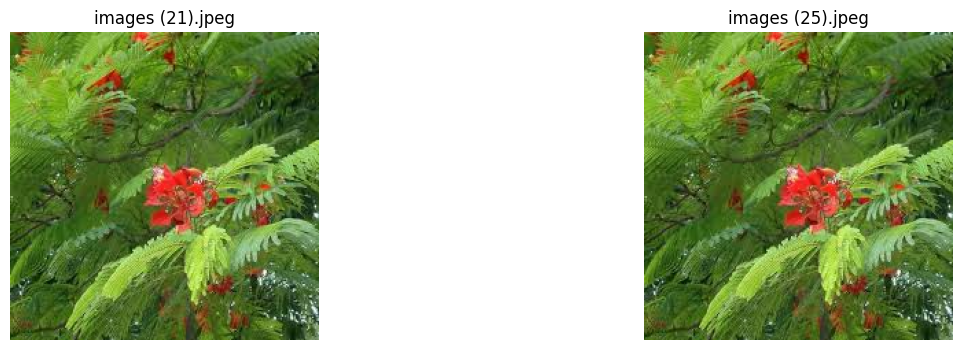

Duplicate set 3:


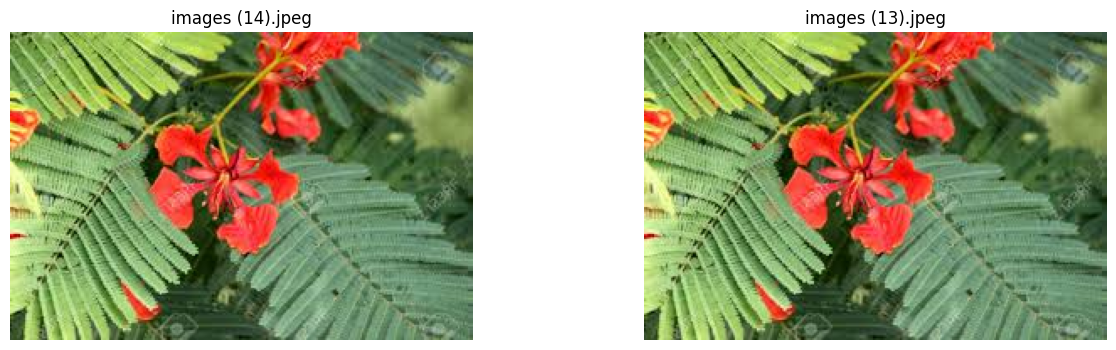

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [21]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [22]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")


🔻 Very small images: 20
🔺 Very large images: 40


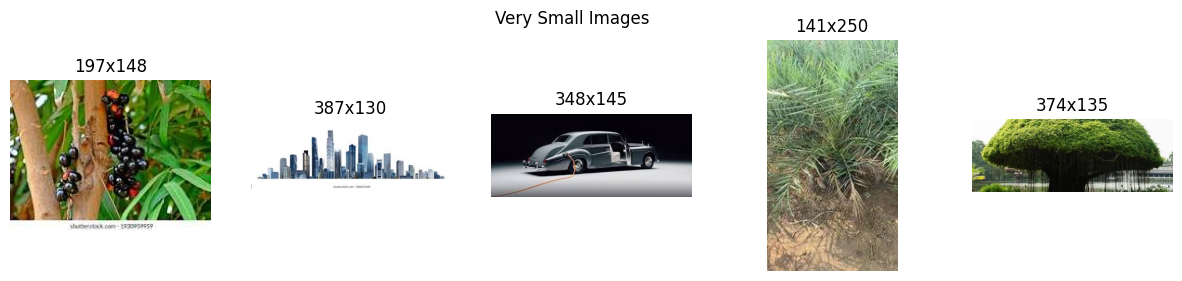

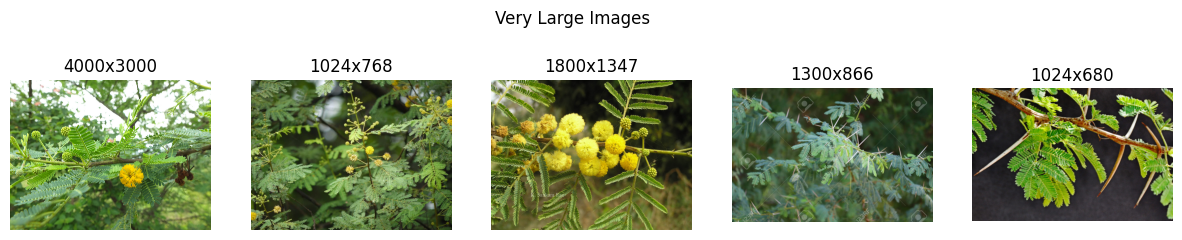

In [23]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [24]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [25]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # For 30 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_gen, validation_data=val_gen, epochs=25)

model.save("improved_cnn_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 35s 710ms/step - accuracy: 0.0635 - loss: 5.2790 - val_accuracy: 0.0325 - val_loss: 7.6578
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 523ms/step - accuracy: 0.1082 - loss: 3.2269 - val_accuracy: 0.0325 - val_loss: 14.6421
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 456ms/step - accuracy: 0.1340 - loss: 3.1501 - val_accuracy: 0.0325 - val_loss: 18.9728
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 459ms/step - accuracy: 0.1435 - loss: 3.0808 - val_accuracy: 0.0325 - val_loss: 21.4127
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 486ms/step - accuracy: 0.1454 - loss: 3.0207 - val_accuracy: 0.0325 - val_loss: 20.4987
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 465ms/step - accuracy: 0.1702 - loss: 2.9594 - val_accuracy: 0.0505 - val_loss: 18.6782
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 456ms/step - accuracy: 0.1681 - loss: 2.9805 - val_accuracy: 0.0325 - val_loss: 17.5919
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 499ms/step - accuracy: 0.1731 - loss: 2.9968 - va

In [28]:
import shutil

# Copy dataset to drive
!cp -r /content/tree-species-dataset /content/drive/MyDrive/

# Copy model to drive
!cp improved_cnn_model.h5 /content/drive/MyDrive/
